In [3]:
%%capture


%pip install pandas
%pip install yfinance
%pip install matplotlib
%pip install numpy 
%pip install scipy
%pip install statsmodels
%pip install openpyxl

In [4]:
import pandas as pd

import yfinance as yf
start_date = '2014-1-1'
end_date ='2024-3-31'


inverse_1x= yf.download('SH', start=start_date, end=end_date) # ticker for Proshares Short SP500 ETF (SH) market cap 1.5b
inverse_2x= yf.download('SDS', start=start_date, end=end_date) # ticker for Proshares UltraShort SP500 ETF (SDS) market cap 1.5b
inverse_3x= yf.download('SPXU', start=start_date, end=end_date) # ticker for Proshares UltraPro SP500 ETF (SPXU) market cap 1.5b

spx_all= yf.download('^GSPC', start=start_date, end=end_date)  #ticker for SP500 index
vix_all = yf.download('^VIX', start=start_date, end=end_date)  #ticker for VIX index
spxvix_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close']}, index=spx_all.index)
vix_etf1 = yf.download('VXZ', start=start_date, end=end_date)  #ticker for VIX ETF VXZ market cap 50m
vix_etf2 = yf.download('VIXM', start=start_date, end=end_date)  #ticker for VIX ETF VIXM market cap 100m chosen for market cap & correlation
vix_etf3 = yf.download('SVOL', start=start_date, end=end_date)  #ticker for VIX ETF SVOL market cap 50m
vix_etf4 = yf.download('VXX', start=start_date, end=end_date)  #ticker for VIX ETF VXX market cap 50m
vix_etf5 = yf.download('VIXY', start=start_date, end=end_date)  #ticker for VIX ETF VIXY market cap 50m
vix_etf6 = yf.download('VIXM', start=start_date, end=end_date)  #ticker for VIX ETF VIXM market cap 50m

spx_etf1 = yf.download('SPY', start=start_date, end=end_date)  #ticker for SP500 ETF SPY market cap 380m
spx_etf2 = yf.download('IVV', start=start_date, end=end_date)  #ticker for SP500 ETF IVV market cap 330m
spx_etf3 = yf.download('VOO', start=start_date, end=end_date)  #ticker for SP500 ETF VOO market cap 300m

vix_etf_all = pd.DataFrame({'VXZ': vix_etf1['Close'], 'VIXM': vix_etf2['Close'], 'SVOL': vix_etf3['Close'], 'VXX': vix_etf4['Close'], 'VIXY': vix_etf5['Close'], 'VIXM': vix_etf6['Close']}, index=vix_etf1.index)
inverse_etf_all = pd.DataFrame({'Inverse1X': inverse_1x['Close'], 'Inverse2x': inverse_2x['Close'], 'Inverse_3x': inverse_3x['Close']}, index=inverse_1x.index)
spx_etf_all = pd.DataFrame({'SPY': spx_etf1['Close'], 'IVV': spx_etf2['Close'], 'VOO': spx_etf3['Close']}, index=spx_etf1.index)
data_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close'], 'VXZ': vix_etf1['Close'], 'VIXM': vix_etf2['Close'], 'SVOL': vix_etf3['Close'], 'VXX': vix_etf4['Close'], 'VIXY': vix_etf5['Close'], 'VIXM': vix_etf6['Close'], 'Inverse1X': inverse_1x['Close'], 'Inverse2x': inverse_2x['Close'], 'Inverse_3x': inverse_3x['Close'], 'SPY': spx_etf1['Close'], 'IVV': spx_etf2['Close'], 'VOO': spx_etf3['Close']}, index=spx_etf1.index)
data_select_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close'], 'VIXM': vix_etf2['Close'], 'Inverse1X': inverse_1x['Close'], 'Inverse2x': inverse_2x['Close'], 'Inverse_3x': inverse_3x['Close'], 'SPY': spx_etf1['Close']}, index=spx_all.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
import numpy as np

rets = np.log(data_all / data_all.shift(1))
rets.head()

,SPX,VIX,VXZ,VIXM,SVOL,VXX,VIXY,Inverse1X,Inverse2x,Inverse_3x,SPY,IVV,VOO
Date,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.000333,-0.033587,NaN,0.000513,NaN,NaN,-0.006548,0.001178,0.001322,0.002577,-0.000164,-0.000435,-0.000895
2014-01-06,-0.002515,-0.015379,NaN,-0.014471,NaN,NaN,-0.012526,0.002352,0.004614,0.007054,-0.002902,-0.002722,-0.002511
2014-01-07,0.006063,-0.047610,NaN,-0.018918,NaN,NaN,-0.022306,-0.005891,-0.011909,-0.018704,0.006123,0.006142,0.006206
2014-01-08,-0.000212,-0.003877,NaN,-0.001593,NaN,NaN,0.001789,-0.000788,-0.001665,-0.001303,0.000218,0.000542,0.000416


In [6]:
# rets = rets.dropna()

In [7]:
rets.head()


,SPX,VIX,VXZ,VIXM,SVOL,VXX,VIXY,Inverse1X,Inverse2x,Inverse_3x,SPY,IVV,VOO
Date,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.000333,-0.033587,NaN,0.000513,NaN,NaN,-0.006548,0.001178,0.001322,0.002577,-0.000164,-0.000435,-0.000895
2014-01-06,-0.002515,-0.015379,NaN,-0.014471,NaN,NaN,-0.012526,0.002352,0.004614,0.007054,-0.002902,-0.002722,-0.002511
2014-01-07,0.006063,-0.047610,NaN,-0.018918,NaN,NaN,-0.022306,-0.005891,-0.011909,-0.018704,0.006123,0.006142,0.006206
2014-01-08,-0.000212,-0.003877,NaN,-0.001593,NaN,NaN,0.001789,-0.000788,-0.001665,-0.001303,0.000218,0.000542,0.000416


In [8]:
rets.head()

,SPX,VIX,VXZ,VIXM,SVOL,VXX,VIXY,Inverse1X,Inverse2x,Inverse_3x,SPY,IVV,VOO
Date,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.000333,-0.033587,NaN,0.000513,NaN,NaN,-0.006548,0.001178,0.001322,0.002577,-0.000164,-0.000435,-0.000895
2014-01-06,-0.002515,-0.015379,NaN,-0.014471,NaN,NaN,-0.012526,0.002352,0.004614,0.007054,-0.002902,-0.002722,-0.002511
2014-01-07,0.006063,-0.047610,NaN,-0.018918,NaN,NaN,-0.022306,-0.005891,-0.011909,-0.018704,0.006123,0.006142,0.006206
2014-01-08,-0.000212,-0.003877,NaN,-0.001593,NaN,NaN,0.001789,-0.000788,-0.001665,-0.001303,0.000218,0.000542,0.000416


In [9]:
avg_rets = rets.mean() * 252    # annualized average returns

In [10]:
avg_rets

SPX           0.103075
VIX          -0.008769
VXZ          -0.034661
VIXM         -0.155789
SVOL         -0.034880
VXX          -0.572791
VIXY         -0.665284
Inverse1X    -0.142502
Inverse2x    -0.312193
Inverse_3x   -0.514295
SPY           0.102783
IVV           0.102698
VOO           0.103058
dtype: float64

In [11]:
cov_matrix = rets.cov() * 252   # annualized covariance matrix

In [12]:
cov_matrix

,SPX,VIX,VXZ,VIXM,SVOL,VXX,VIXY,Inverse1X,Inverse2x,Inverse_3x,SPY,IVV,VOO
SPX,0.031221,-0.160057,-0.046820,-0.042524,0.018115,-0.106941,-0.092783,-0.030860,-0.061399,-0.091568,0.030900,0.031250,0.031076
VIX,-0.160057,1.551141,0.266985,0.303411,-0.128858,0.790168,0.754956,0.157470,0.313398,0.467136,-0.158832,-0.160271,-0.158893
VXZ,-0.046820,0.266985,0.118578,0.101058,-0.032640,0.180543,0.188898,0.045773,0.090609,0.134296,-0.046286,-0.047052,-0.046553
VIXM,-0.042524,0.303411,0.101058,0.102349,-0.032416,0.212022,0.196392,0.041758,0.082862,0.123184,-0.042181,-0.042670,-0.042253
SVOL,0.018115,-0.128858,-0.032640,-0.032416,0.023459,-0.073287,-0.081722,-0.017934,-0.035707,-0.053456,0.018179,0.018159,0.017984
VXX,-0.106941,0.790168,0.180543,0.212022,-0.073287,0.495348,0.494266,0.104304,0.206770,0.306546,-0.106058,-0.107145,-0.106060
VIXY,-0.092783,0.754956,0.188898,0.196392,-0.081722,0.494266,0.455604,0.090960,0.180548,0.268428,-0.092195,-0.093026,-0.092184
Inverse1X,-0.030860,0.157470,0.045773,0.041758,-0.017934,0.104304,0.090960,0.030785,0.061061,0.091099,-0.030589,-0.030922,-0.030750
Inverse2x,-0.061399,0.313398,0.090609,0.082862,-0.035707,0.206770,0.180548,0.061061,0.121676,0.181618,-0.060882,-0.061526,-0.061180
Inverse_3x,-0.091568,0.467136,0.134296,0.123184,-0.053456,0.306546,0.268428,0.091099,0.181618,0.271823,-0.090816,-0.091758,-0.091232


In [13]:
corr_matrix = rets.corr()       # correlation matrix

In [14]:

corr_matrix

,SPX,VIX,VXZ,VIXM,SVOL,VXX,VIXY,Inverse1X,Inverse2x,Inverse_3x,SPY,IVV,VOO
SPX,1.000000,-0.727323,-0.661496,-0.752266,0.676749,-0.739245,-0.777953,-0.995416,-0.996176,-0.993984,0.997219,0.997721,0.997872
VIX,-0.727323,1.000000,0.612115,0.761490,-0.798913,0.886364,0.898053,0.720618,0.721387,0.719407,-0.727220,-0.725956,-0.723850
VXZ,-0.661496,0.612115,1.000000,0.862546,-0.769788,0.744945,0.762967,0.651648,0.649134,0.644161,-0.660384,-0.662855,-0.659831
VIXM,-0.752266,0.761490,0.862546,1.000000,-0.775460,0.885400,0.909471,0.743923,0.742528,0.738536,-0.751845,-0.752422,-0.749347
SVOL,0.676749,-0.798913,-0.769788,-0.775460,1.000000,-0.796354,-0.847108,-0.671639,-0.669840,-0.669518,0.675405,0.675586,0.673858
VXX,-0.739245,0.886364,0.744945,0.885400,-0.796354,1.000000,0.976760,0.726525,0.724765,0.719406,-0.740349,-0.738518,-0.735497
VIXY,-0.777953,0.898053,0.762967,0.909471,-0.847108,0.976760,1.000000,0.768055,0.766825,0.762765,-0.778871,-0.777486,-0.774879
Inverse1X,-0.995416,0.720618,0.651648,0.743923,-0.671639,0.726525,0.768055,1.000000,0.997684,0.995878,-0.994159,-0.994218,-0.994376
Inverse2x,-0.996176,0.721387,0.649134,0.742528,-0.669840,0.724765,0.766825,0.997684,1.000000,0.998651,-0.995272,-0.995026,-0.995117
Inverse_3x,-0.993984,0.719407,0.644161,0.738536,-0.669518,0.719406,0.762765,0.995878,0.998651,1.000000,-0.993279,-0.992841,-0.992828


In [15]:
data_select_all.head()

,SPX,VIX,VIXM,Inverse1X,Inverse2x,Inverse_3x,SPY
Date,,,,,,,
2014-01-02,1831.979980,14.23,77.919998,50.900002,604.599976,6200.0,182.919998
2014-01-03,1831.369995,13.76,77.959999,50.959999,605.400024,6216.0,182.889999
2014-01-06,1826.770020,13.55,76.839996,51.080002,608.200012,6260.0,182.360001
2014-01-07,1837.880005,12.92,75.400002,50.779999,601.000000,6144.0,183.479996
2014-01-08,1837.489990,12.87,75.279999,50.740002,600.000000,6136.0,183.520004


In [16]:
data_select_all.tail()

,SPX,VIX,VIXM,Inverse1X,Inverse2x,Inverse_3x,SPY
Date,,,,,,,
2024-03-22,5234.180176,13.06,15.94,11.88,24.969999,32.549999,521.210022
2024-03-25,5218.189941,13.19,15.91,11.92,25.120001,32.849998,519.770020
2024-03-26,5203.580078,13.24,15.80,11.95,25.250000,33.099998,518.809998
2024-03-27,5248.490234,12.78,15.71,11.85,24.850000,32.250000,523.169983
2024-03-28,5254.350098,13.01,15.85,11.86,24.860001,32.299999,523.070007


In [17]:
import numpy as np

rets_2 = np.log(data_select_all / data_select_all.shift(1))
rets_2.head()
avg_rets_2_mean = rets_2.mean() * 252    # annualized average returns
avg_rets_2_stddev = rets_2.std() * np.sqrt(252)    # annualized standard deviation
avg_rets_2_corr = rets_2.corr()       # correlation matrix
avg_rets_2_cov = rets_2.cov() * 252   # annualized covariance matrix




In [18]:
avg_rets_2_mean

SPX           0.103075
VIX          -0.008769
VIXM         -0.155789
Inverse1X    -0.142502
Inverse2x    -0.312193
Inverse_3x   -0.514295
SPY           0.102783
dtype: float64

In [19]:
avg_rets_2_stddev

SPX           0.176694
VIX           1.245448
VIXM          0.319920
Inverse1X     0.175455
Inverse2x     0.348821
Inverse_3x    0.521367
SPY           0.175367
dtype: float64

In [20]:
rets_2.cov() * 252   # annualized covariance matrix


,SPX,VIX,VIXM,Inverse1X,Inverse2x,Inverse_3x,SPY
SPX,0.031221,-0.160057,-0.042524,-0.030860,-0.061399,-0.091568,0.030900
VIX,-0.160057,1.551141,0.303411,0.157470,0.313398,0.467136,-0.158832
VIXM,-0.042524,0.303411,0.102349,0.041758,0.082862,0.123184,-0.042181
Inverse1X,-0.030860,0.157470,0.041758,0.030785,0.061061,0.091099,-0.030589
Inverse2x,-0.061399,0.313398,0.082862,0.061061,0.121676,0.181618,-0.060882
Inverse_3x,-0.091568,0.467136,0.123184,0.091099,0.181618,0.271823,-0.090816
SPY,0.030900,-0.158832,-0.042181,-0.030589,-0.060882,-0.090816,0.030754


In [21]:
avg_rets_2_stddev;


In [22]:
avg_rets_2_corr

,SPX,VIX,VIXM,Inverse1X,Inverse2x,Inverse_3x,SPY
SPX,1.000000,-0.727323,-0.752266,-0.995416,-0.996176,-0.993984,0.997219
VIX,-0.727323,1.000000,0.761490,0.720618,0.721387,0.719407,-0.727220
VIXM,-0.752266,0.761490,1.000000,0.743923,0.742528,0.738536,-0.751845
Inverse1X,-0.995416,0.720618,0.743923,1.000000,0.997684,0.995878,-0.994159
Inverse2x,-0.996176,0.721387,0.742528,0.997684,1.000000,0.998651,-0.995272
Inverse_3x,-0.993984,0.719407,0.738536,0.995878,0.998651,1.000000,-0.993279
SPY,0.997219,-0.727220,-0.751845,-0.994159,-0.995272,-0.993279,1.000000


In [23]:
avg_rets_2_cov

,SPX,VIX,VIXM,Inverse1X,Inverse2x,Inverse_3x,SPY
SPX,0.031221,-0.160057,-0.042524,-0.030860,-0.061399,-0.091568,0.030900
VIX,-0.160057,1.551141,0.303411,0.157470,0.313398,0.467136,-0.158832
VIXM,-0.042524,0.303411,0.102349,0.041758,0.082862,0.123184,-0.042181
Inverse1X,-0.030860,0.157470,0.041758,0.030785,0.061061,0.091099,-0.030589
Inverse2x,-0.061399,0.313398,0.082862,0.061061,0.121676,0.181618,-0.060882
Inverse_3x,-0.091568,0.467136,0.123184,0.091099,0.181618,0.271823,-0.090816
SPY,0.030900,-0.158832,-0.042181,-0.030589,-0.060882,-0.090816,0.030754


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

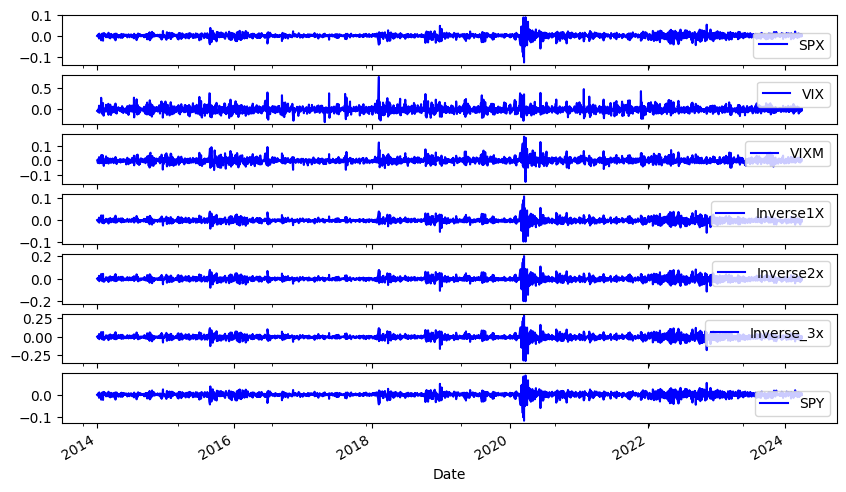

In [24]:
rets_2.plot(subplots=True, figsize=(10, 6),color='blue')

<Axes: xlabel='SPX', ylabel='VIX'>

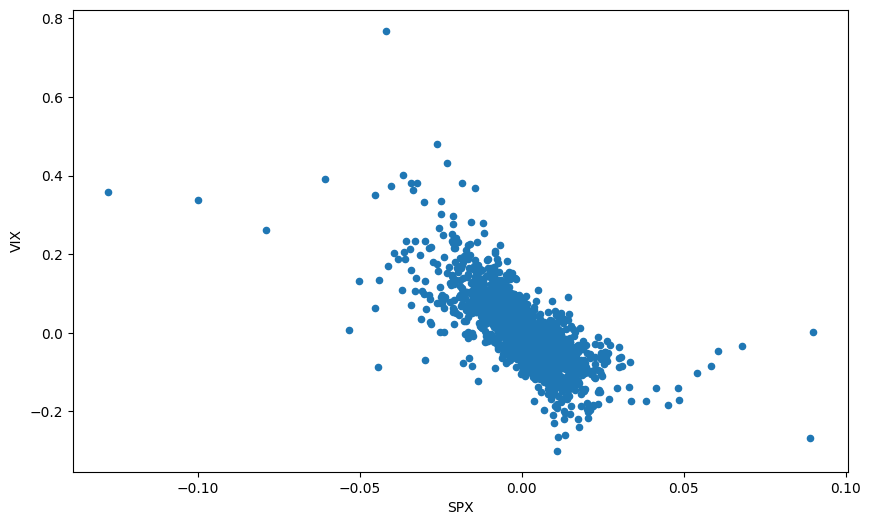

In [25]:
rets_2.plot(kind='scatter', x='SPX', y='VIX', figsize=(10, 6))

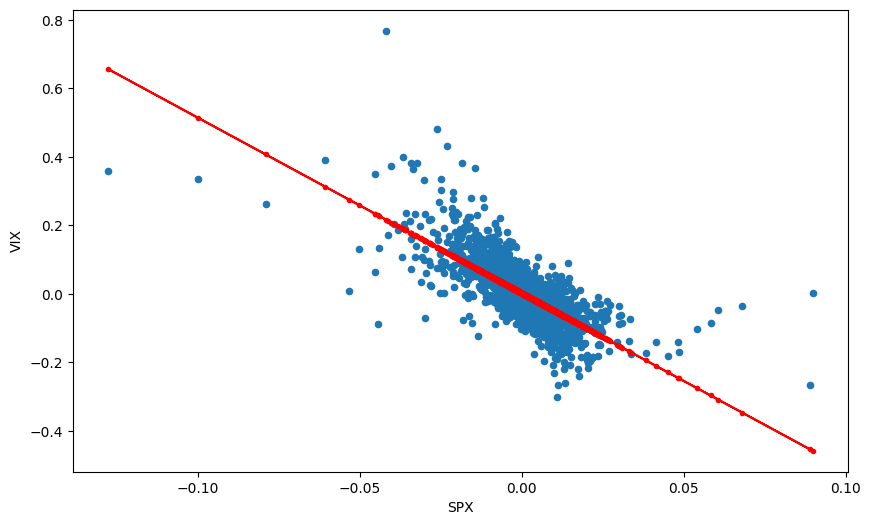

In [26]:
import numpy as np

import matplotlib.pyplot as plt

# Drop NaN values from rets_2
rets_2 = rets_2.dropna()

rets_2.plot(kind='scatter', x='SPX', y='VIX', style='.', figsize=(10, 6));
rg = np.polyfit(rets_2['SPX'], rets_2['VIX'], 1)
plt.plot(rets_2['SPX'], np.polyval(rg, rets_2['SPX']), 'r.-')
plt.xlabel('SPX')
plt.ylabel('VIX')
plt.show()


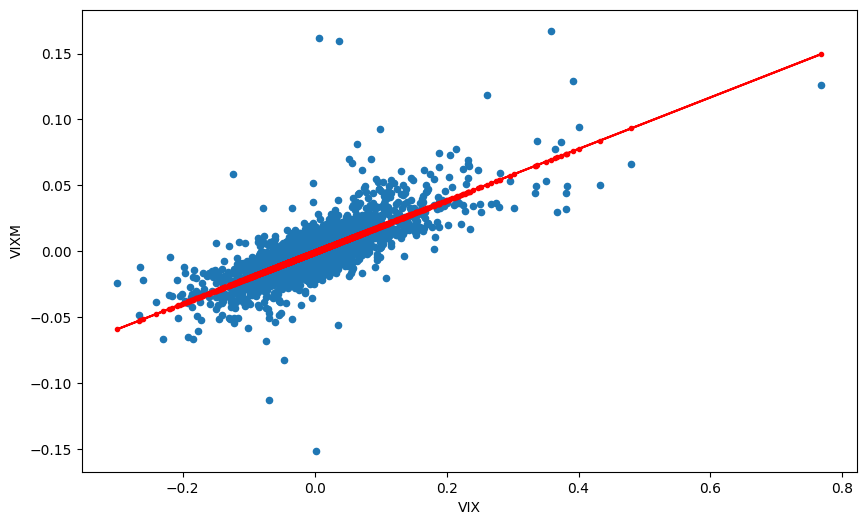

In [27]:
rets_2.plot(kind='scatter', x='VIX', y='VIXM', figsize=(10, 6))    
rg = np.polyfit(rets_2['VIX'], rets_2['VIXM'], 1)
plt.plot(rets_2['VIX'], np.polyval(rg, rets_2['VIX']), 'r.-')
plt.xlabel('VIX')
plt.ylabel('VIXM')
plt.show()



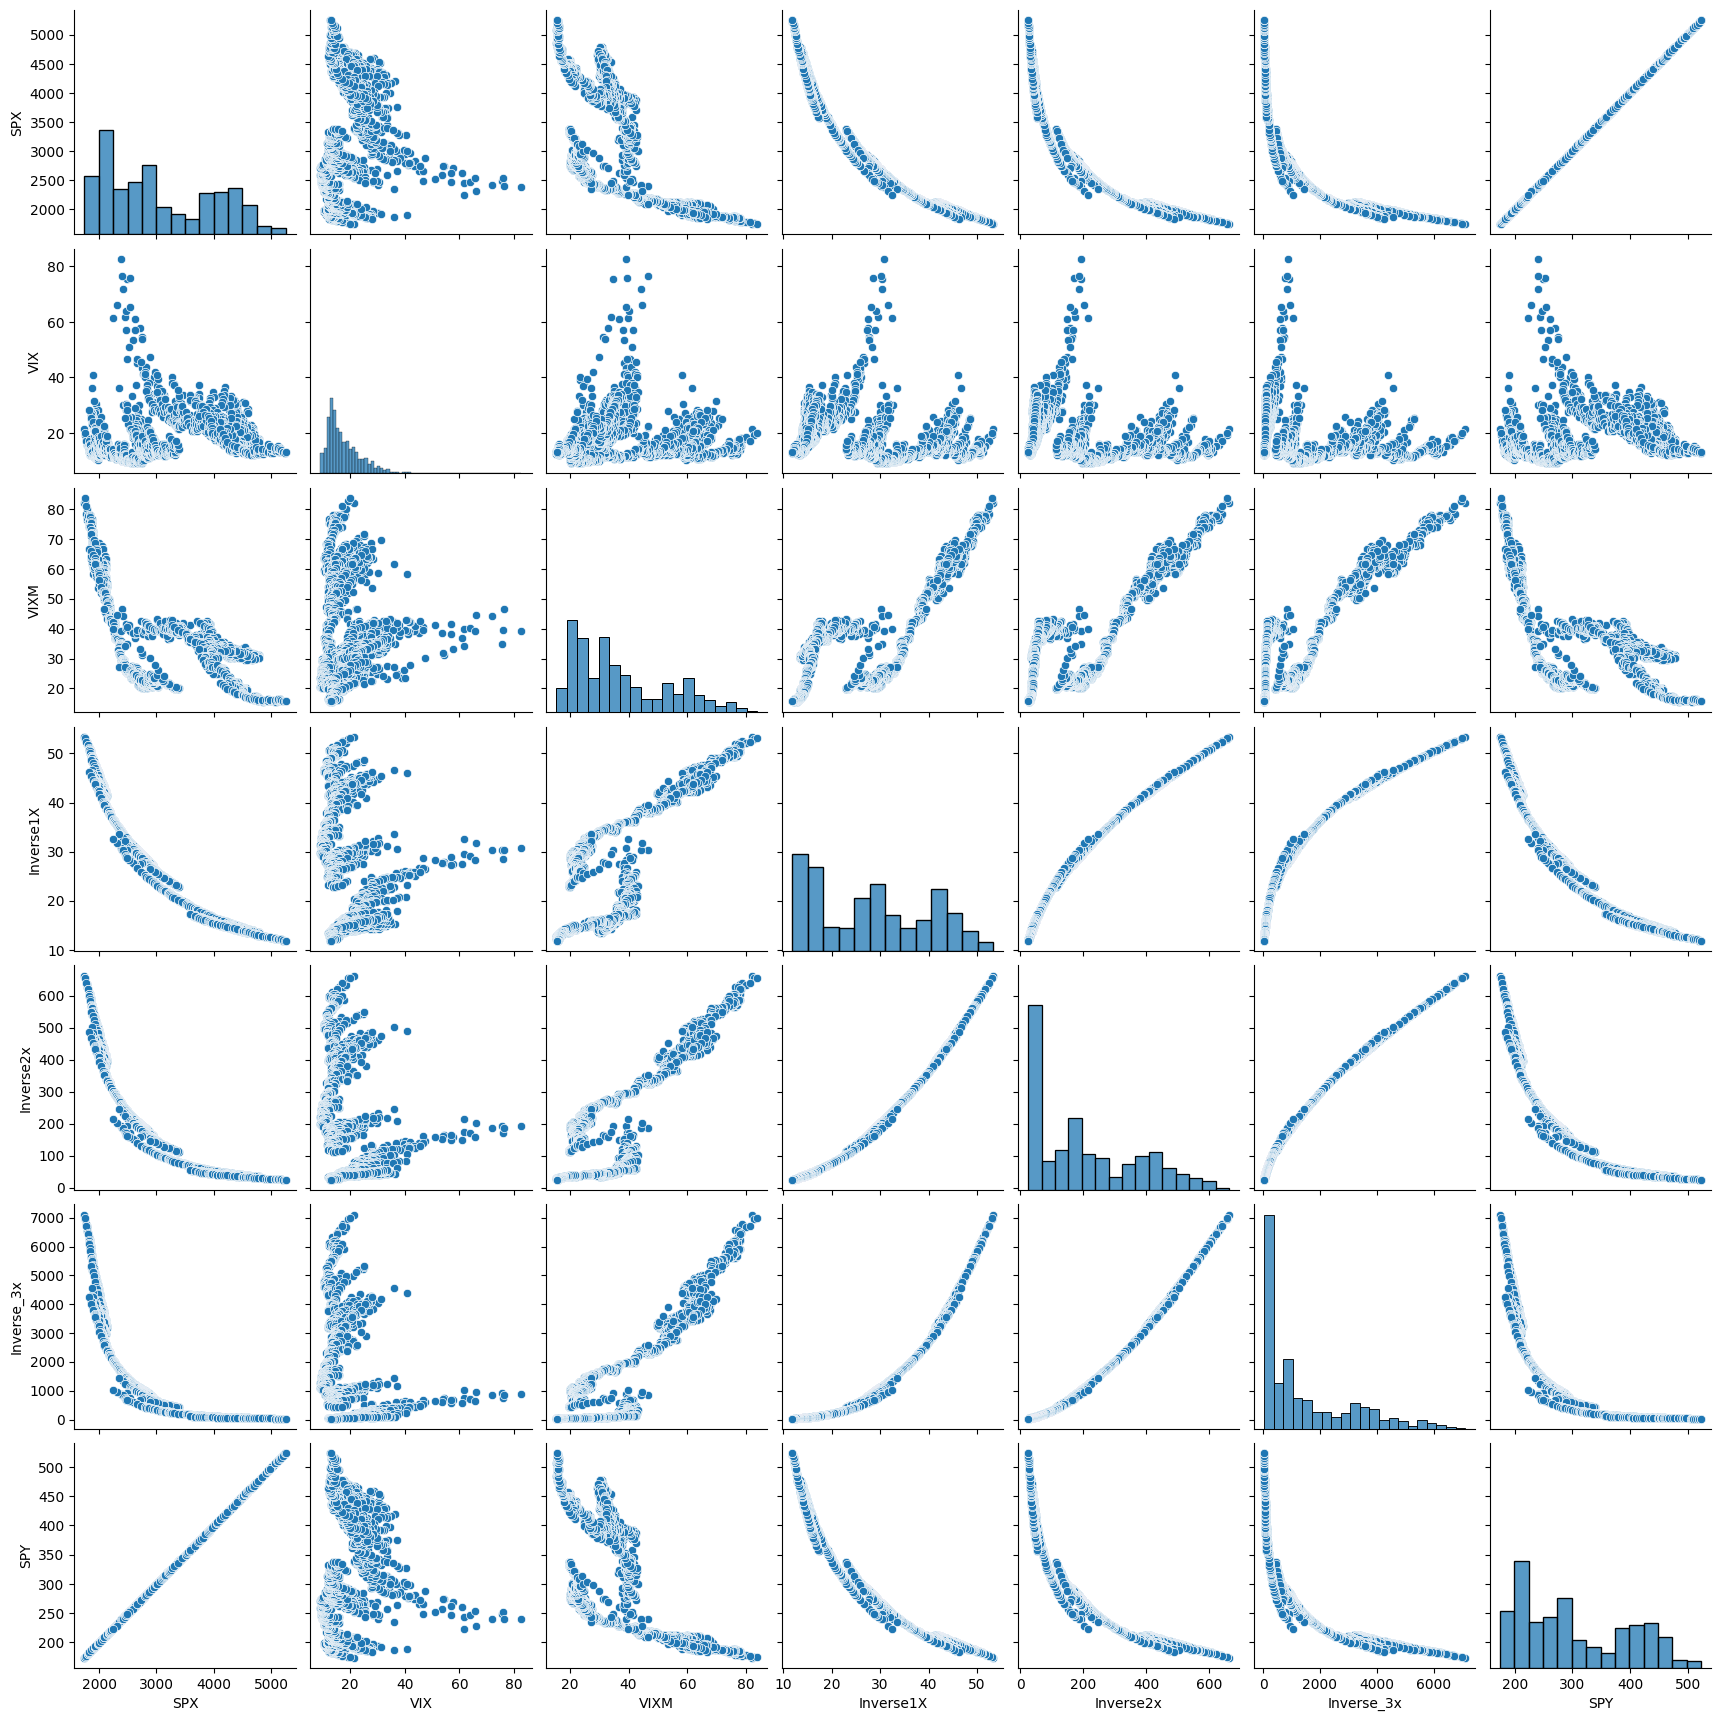

In [28]:
import seaborn as sns

# Drop rows with missing values for accurate plotting
data_all_dropped = data_all.dropna()
data_select_all_dropped = data_select_all.dropna()
sns.pairplot(data_select_all_dropped)
plt.show()


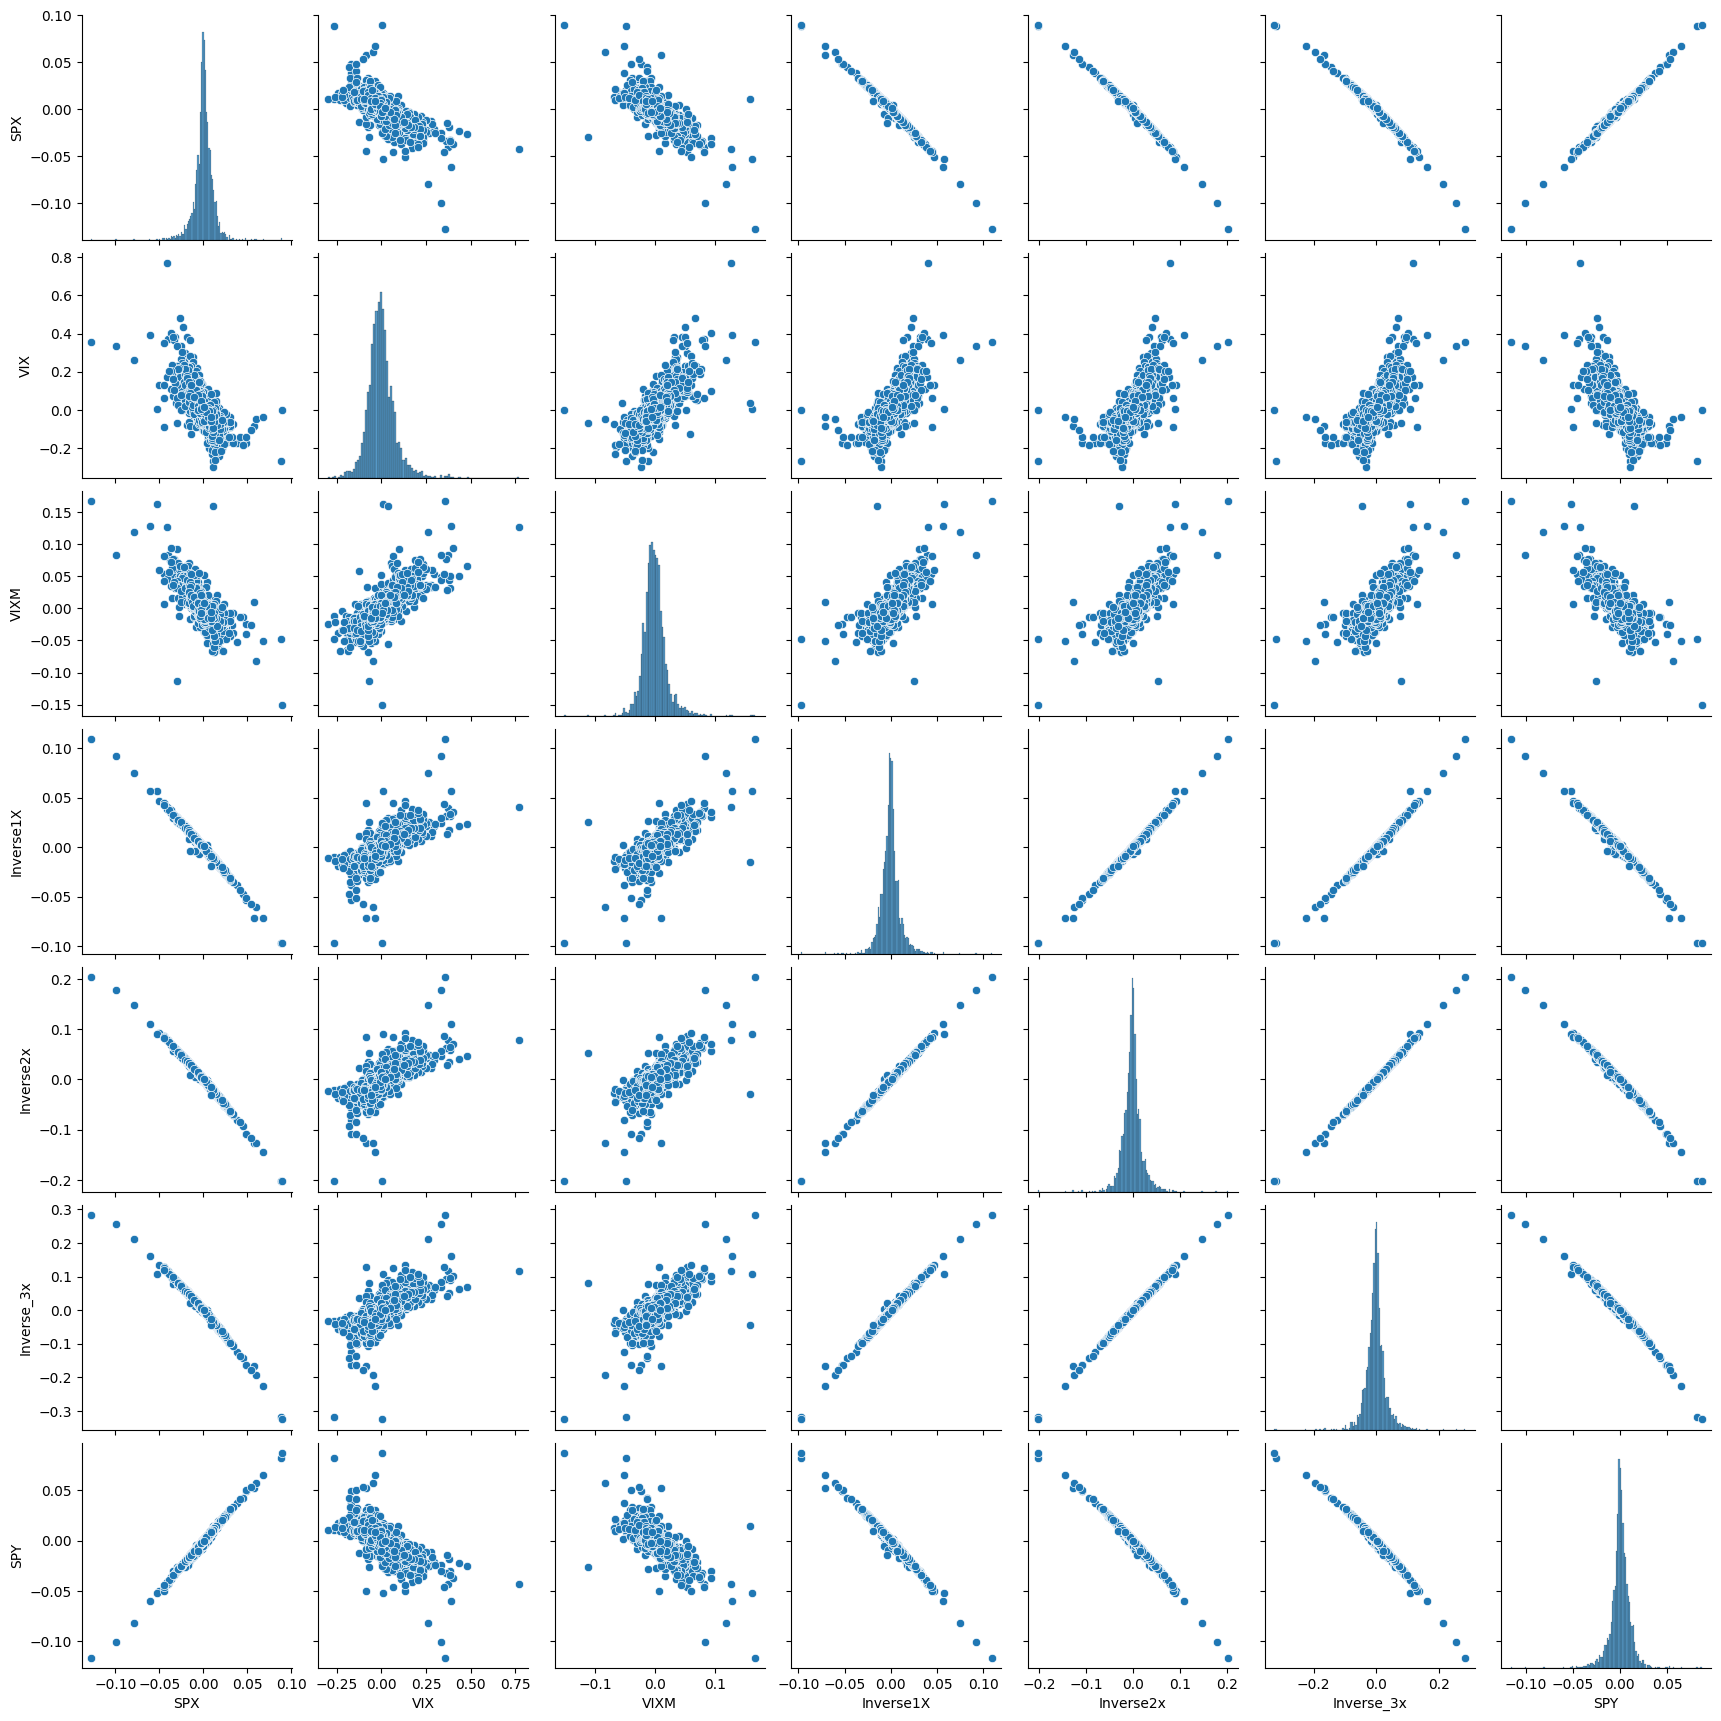

In [29]:
import seaborn as sns

# Drop rows with missing values for accurate plotting
rets_2_droppedna=rets_2.dropna()
sns.pairplot(rets_2_droppedna)
plt.show()


In [30]:
import pandas as pd

import yfinance as yf
start_date = '2014-1-1'
end_date ='2024-3-31'


inverse_1x= yf.download('SH', start=start_date, end=end_date) # ticker for Proshares Short SP500 ETF (SH) market cap 1.5b
inverse_2x= yf.download('SDS', start=start_date, end=end_date) # ticker for Proshares UltraShort SP500 ETF (SDS) market cap 1.5b
inverse_3x= yf.download('SPXU', start=start_date, end=end_date) # ticker for Proshares UltraPro SP500 ETF (SPXU) market cap 1.5b

spx_all= yf.download('^GSPC', start=start_date, end=end_date)  #ticker for SP500 index
vix_all = yf.download('^VIX', start=start_date, end=end_date)  #ticker for VIX index
spxvix_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close']}, index=spx_all.index)
vix_etf1 = yf.download('VXZ', start=start_date, end=end_date)  #ticker for VIX ETF VXZ market cap 50m
vix_etf2 = yf.download('VIXM', start=start_date, end=end_date)  #ticker for VIX ETF VIXM market cap 100m chosen for market cap & correlation
vix_etf3 = yf.download('SVOL', start=start_date, end=end_date)  #ticker for VIX ETF SVOL market cap 50m
vix_etf4 = yf.download('VXX', start=start_date, end=end_date)  #ticker for VIX ETF VXX market cap 50m
vix_etf5 = yf.download('VIXY', start=start_date, end=end_date)  #ticker for VIX ETF VIXY market cap 50m
vix_etf6 = yf.download('VIXM', start=start_date, end=end_date)  #ticker for VIX ETF VIXM market cap 50m

spx_etf1 = yf.download('SPY', start=start_date, end=end_date)  #ticker for SP500 ETF SPY market cap 380m
spx_etf2 = yf.download('IVV', start=start_date, end=end_date)  #ticker for SP500 ETF IVV market cap 330m
spx_etf3 = yf.download('VOO', start=start_date, end=end_date)  #ticker for SP500 ETF VOO market cap 300m

vix_etf_all = pd.DataFrame({'VXZ': vix_etf1['Close'], 'VIXM': vix_etf2['Close'], 'SVOL': vix_etf3['Close'], 'VXX': vix_etf4['Close'], 'VIXY': vix_etf5['Close'], 'VIXM': vix_etf6['Close']}, index=vix_etf1.index)
inverse_etf_all = pd.DataFrame({'Inverse1X': inverse_1x['Close'], 'Inverse2x': inverse_2x['Close'], 'Inverse_3x': inverse_3x['Close']}, index=inverse_1x.index)
spx_etf_all = pd.DataFrame({'SPY': spx_etf1['Close'], 'IVV': spx_etf2['Close'], 'VOO': spx_etf3['Close']}, index=spx_etf1.index)
data_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close'], 'VXZ': vix_etf1['Close'], 'VIXM': vix_etf2['Close'], 'SVOL': vix_etf3['Close'], 'VXX': vix_etf4['Close'], 'VIXY': vix_etf5['Close'], 'VIXM': vix_etf6['Close'], 'Inverse1X': inverse_1x['Close'], 'Inverse2x': inverse_2x['Close'], 'Inverse_3x': inverse_3x['Close'], 'SPY': spx_etf1['Close'], 'IVV': spx_etf2['Close'], 'VOO': spx_etf3['Close']}, index=spx_etf1.index)
data_select_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close'], 'VIXM': vix_etf2['Close'], 'Inverse1X': inverse_1x['Close'], 'Inverse2x': inverse_2x['Close'], 'Inverse_3x': inverse_3x['Close'], 'SPY': spx_etf1['Close']}, index=spx_all.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

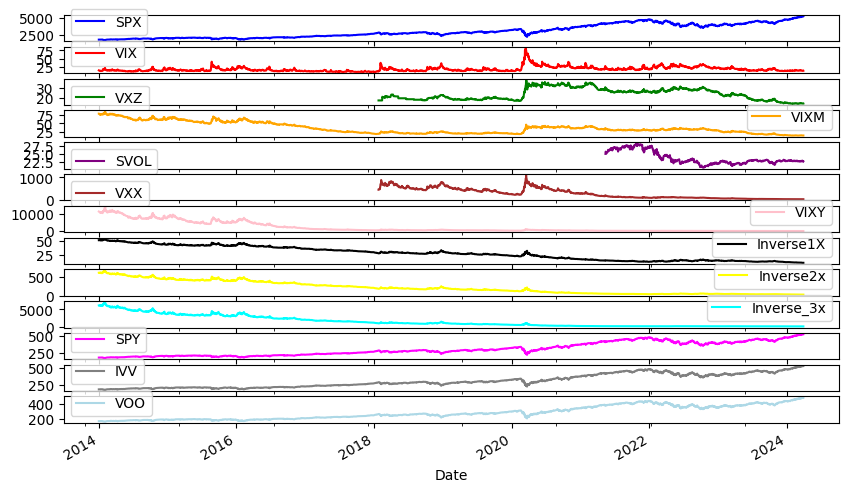

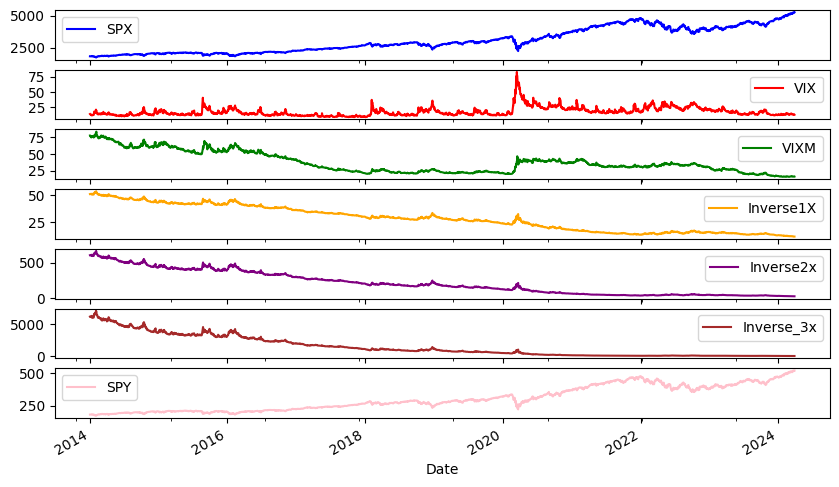

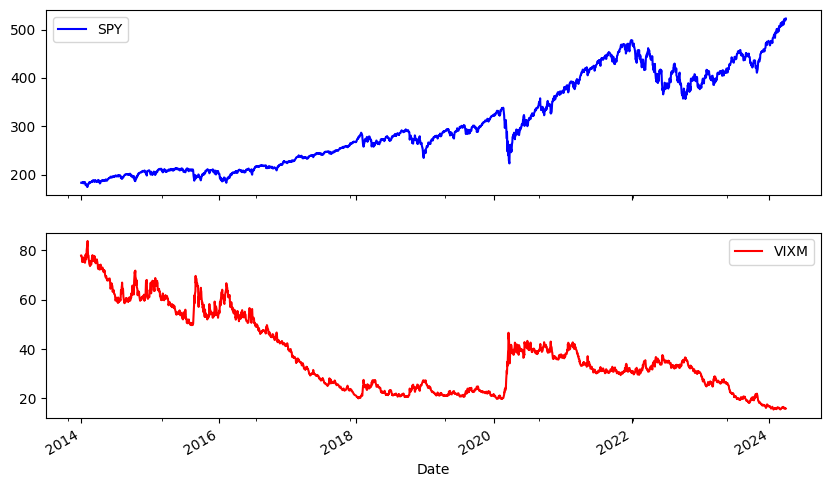

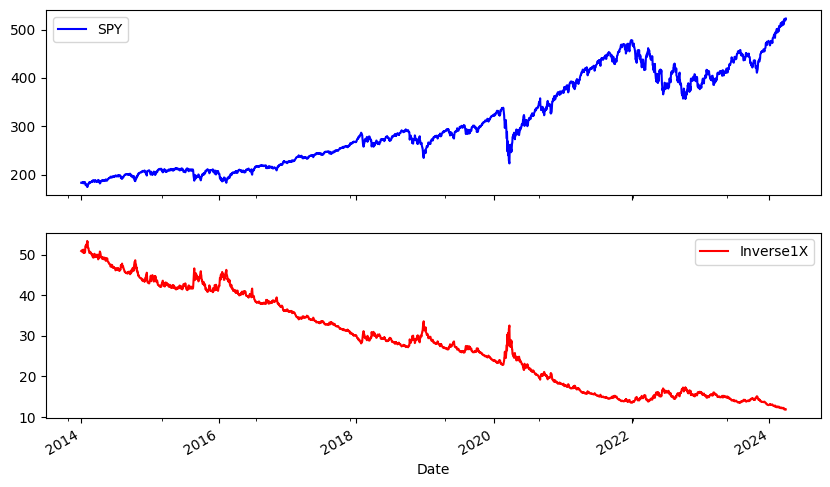

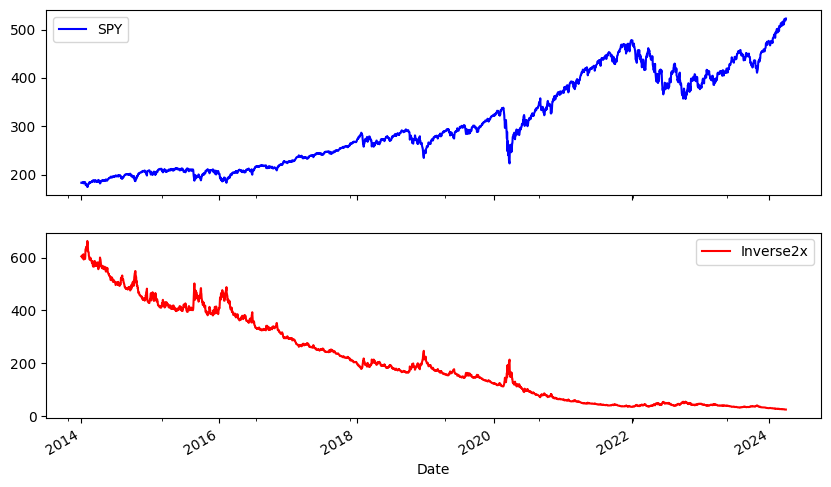

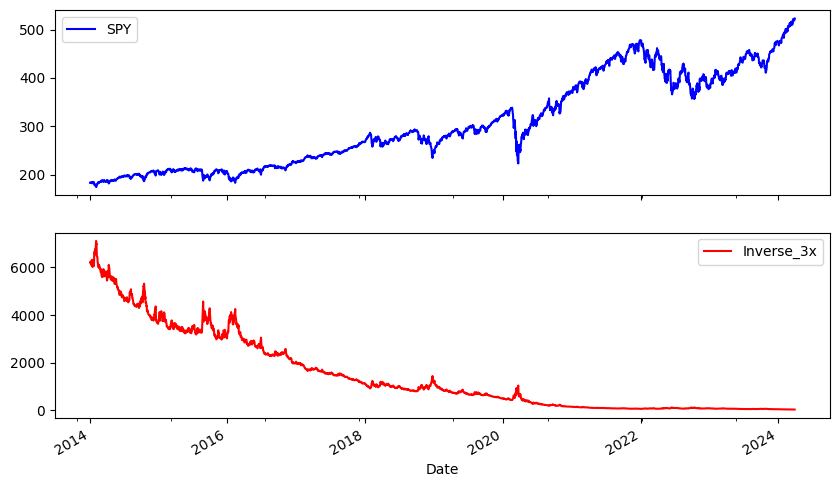

In [31]:
spyvixm_etf = pd.DataFrame({'SPY': spx_etf1['Close'], 'VIXM': vix_etf2['Close']}, index=spx_etf1.index)
spyinverse1x_etf = pd.DataFrame({'SPY': spx_etf1['Close'], 'Inverse1X': inverse_1x['Close']}, index=spx_etf1.index)
spyinverse2x_etf = pd.DataFrame({'SPY': spx_etf1['Close'], 'Inverse2x': inverse_2x['Close']}, index=spx_etf1.index)
spyinverse3x_etf = pd.DataFrame({'SPY': spx_etf1['Close'], 'Inverse_3x': inverse_3x['Close']}, index=spx_etf1.index)
data_all.plot(subplots=True, figsize=(10, 6),color=['blue','red','green','orange','purple','brown','pink','black','yellow','cyan','magenta','grey','lightblue','lightgreen'])
data_select_all.plot(subplots=True, figsize=(10, 6),color=['blue','red','green','orange','purple','brown','pink'])
spyvixm_etf.plot(subplots=True, figsize=(10, 6),color=['blue','red'])
spyinverse1x_etf.plot(subplots=True, figsize=(10, 6),color=['blue','red'])
spyinverse2x_etf.plot(subplots=True, figsize=(10, 6),color=['blue','red'])
spyinverse3x_etf.plot(subplots=True, figsize=(10, 6),color=['blue','red'])




In [32]:
'''

start_date = '2000-1-1'
end_date ='2024-3-31'

vix_etf= yf.download('VXZ', start=start_date, end=end_date) # ticker for Proshares Short SP500 ETF (SH)

inverse_1x= yf.download('SH', start=start_date, end=end_date) # ticker for Proshares Short SP500 ETF (SH)
inverse_2x= yf.download('SDS', start=start_date, end=end_date) # ticker for Proshares UltraShort SP500 ETF (SDS)
inverse_3x= yf.download('SPXU', start=start_date, end=end_date) # ticker for Proshares UltraPro SP500 ETF (SPXU)

spx_all= yf.download('^GSPC', start=start_date, end=end_date)  #ticker for SP500 index
vix_all = yf.download('^VIX', start=start_date, end=end_date)  #ticker for VIX index
spxvix_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close']}, index=spx_all.index)

data_all = pd.DataFrame({'SPX': spx_all['Close'], 'VIX': vix_all['Close'], 'Inverse1X': inverse_1x['Close'], 'Inverse2x': inverse_2x['Close'], 'Inverse_3x': inverse_3x['Close']}, index=spx_all.index)

'''

# Ensure 'rets' is defined before using it
rets_final = np.log(data_select_all / data_select_all.shift(1))
rets_final = rets_final.dropna()

avg_rets_final = rets_final.mean() * 252    # annualized average returns
cov_matrix_final = rets_final.cov() * 252   # annualized covariance matrix
corr_matrix_final = rets_final.corr()       # correlation matrix

avg_stddev_final = rets_final.std() * np.sqrt(252)  # annualized volatility  
sharpe_ratio_final =  (avg_rets_final - 0.01) / avg_stddev_final # assuming risk-free rate of 1%

# Create a dataframe with the results
result_df = pd.DataFrame({
    'Average Returns': avg_rets_final,
    'Average Volatility': avg_stddev_final,
    'Sharpe Ratio': sharpe_ratio_final,
})

# Save the result dataframe and the matrices separately
result_df.to_excel('result.xlsx')
corr_matrix_final.to_excel('corr_matrix_final.xlsx')

# result = (avg_rets, avg_vol, cov_matrix, sharpe_ratio, result_df)

In [33]:
result_df

,Average Returns,Average Volatility,Sharpe Ratio
SPX,0.103075,0.176694,0.526761
VIX,-0.008769,1.245448,-0.015070
VIXM,-0.155789,0.319920,-0.518221
Inverse1X,-0.142502,0.175455,-0.869181
Inverse2x,-0.312193,0.348821,-0.923663
Inverse_3x,-0.514295,0.521367,-1.005617
SPY,0.102783,0.175367,0.529077


In [34]:
print(corr_matrix_final)

                 SPX       VIX      VIXM  Inverse1X  Inverse2x  Inverse_3x  \
SPX         1.000000 -0.727323 -0.752266  -0.995416  -0.996176   -0.993984   
VIX        -0.727323  1.000000  0.761490   0.720618   0.721387    0.719407   
VIXM       -0.752266  0.761490  1.000000   0.743923   0.742528    0.738536   
Inverse1X  -0.995416  0.720618  0.743923   1.000000   0.997684    0.995878   
Inverse2x  -0.996176  0.721387  0.742528   0.997684   1.000000    0.998651   
Inverse_3x -0.993984  0.719407  0.738536   0.995878   0.998651    1.000000   
SPY         0.997219 -0.727220 -0.751845  -0.994159  -0.995272   -0.993279   

                 SPY  
SPX         0.997219  
VIX        -0.727220  
VIXM       -0.751845  
Inverse1X  -0.994159  
Inverse2x  -0.995272  
Inverse_3x -0.993279  
SPY         1.000000  


<Axes: xlabel='SPX', ylabel='VIX'>

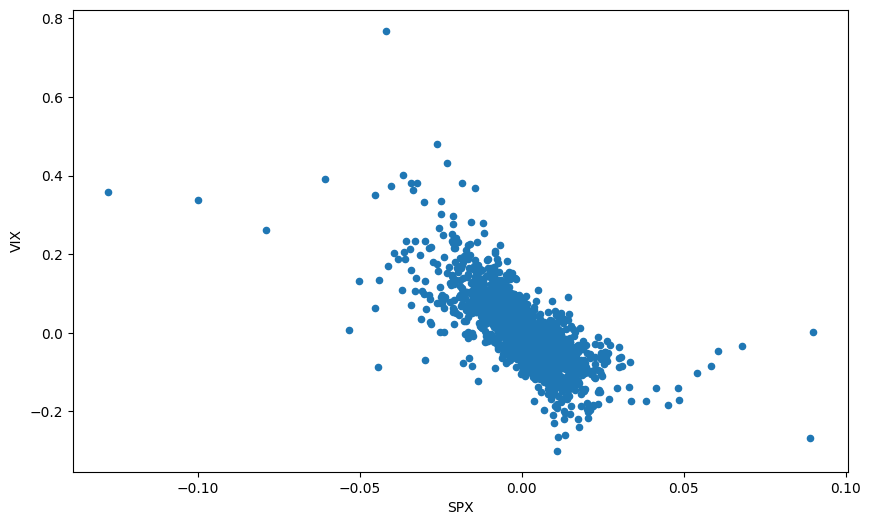

In [35]:
rets_final.plot(kind='scatter', x='SPX', y='VIX', style='.', figsize=(10, 6))

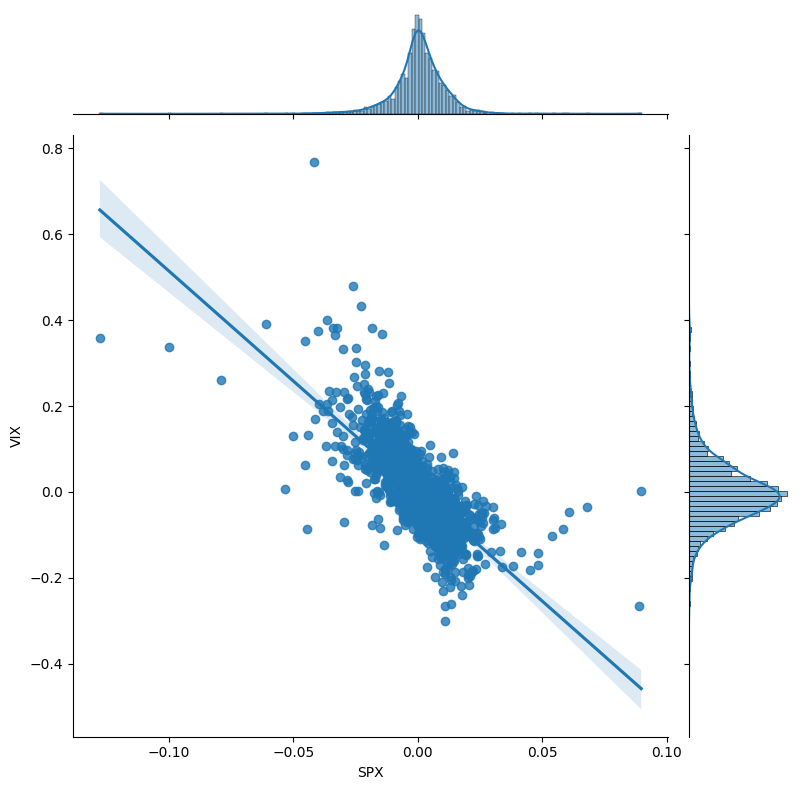

In [36]:
sns.jointplot(x='SPX', y='VIX', data=rets_final, kind='reg', height=8)

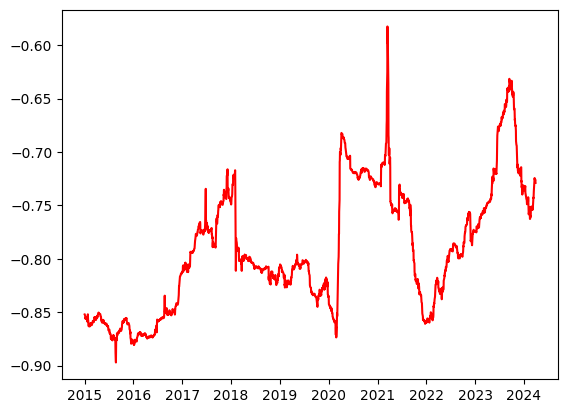

In [37]:
rets_final['Corr_spxvix']= rets_final['SPX'].rolling(window=252).corr(rets_final['VIX'])
plt.plot(rets_final['Corr_spxvix'], color='r', label='Rolling 1-Year Correlation')

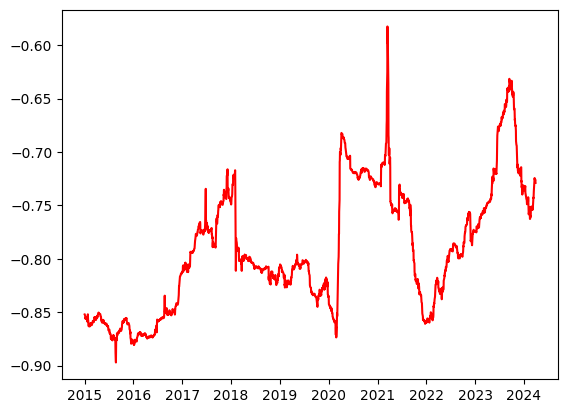

In [38]:
rets_final['Corr_spxvix']= rets_final['SPX'].rolling(window=252).corr(rets_final['VIX'])
plt.plot(rets_final['Corr_spxvix'], color='r', label='Rolling 1-Year Correlation')



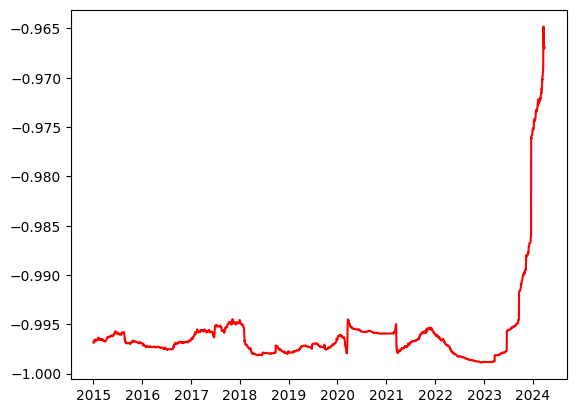

In [39]:
rets_final['Corr_spxinv1x'] = rets_final['SPX'].rolling(window=252).corr(rets_final['Inverse1X'])
plt.plot(rets_final['Corr_spxinv1x'], color='r', label='Rolling 1-Year Correlation')


In [43]:
'''ArithmeticError
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'SPX' is a column in a DataFrame named 'df'

# Define the variable 'spx_all' here or execute the cell that defines it before executing this cell

df['SPX'] = pd.DataFrame({'SPX': spx_all['Close']})
df['30_day_MA'] = spx_all.rolling(window=30).mean()

# Plotting the SPX data
df['SPX'].plot(label='SPX')

# Plotting the 30-day moving average
df['30_day_MA'].plot(label='30-day MA')

plt.legend()
plt.show()
'''

ValueError: Cannot set a DataFrame with multiple columns to the single column 30_day_MA